**Aluno:** Paulo Ricardo Finardi

**RA:** 144809

--------------------------------------------------




_1 - Faca o PCA dos dados (sem a última coluna). Se voce quiser que os dados transformados tenham 80\% da variância original, quantas dimensões do PCA vc precisa manter?_

#### Resposta: 
São necessárias 12 dimensões. As entradas do código de 1 até 5, descrevem o processo utilizado para encontrarmos esse número.



In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# for better plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# read dada1.csv in python with Pandas
data1 = pd.read_csv('data1.csv')

# delete the last column of data1
data1.set_index('clase').to_csv('data.csv', index=None)

# saving new file in csv format
data = pd.read_csv('data.csv')

# convert the datas in numpy-array 
data1 = data1.as_matrix(columns=None)
data = data.as_matrix(columns=None)



In [3]:
# function PCA with sklearn
def doPCA(x): # x is the argument for the number of components in PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=x)
    pca.fit(data)
    return pca

In [4]:
# this step is obsolete, but we'll repeat the PCA after we find the requested variance.
pca = doPCA(data.shape[1])

# the elements of the _variance contains the total variance.
_variance = pca.explained_variance_ratio_ 

In [5]:
# store the requested variance
requested_variance = 0

# the number of the variance requested
lim = 0.80

# loop to find the quantity of elements
for i in range (len(_variance)):
    requested_variance += _variance[i]
    if requested_variance >= lim:
        element = i
        requested_variance -= _variance[i] # just for adjust the index
        break

print('With %d elements, we get the requested variance, that is: %.3f.' % 
     (element, requested_variance))


With 12 elements, we get the requested variance, that is: 0.798.


In [6]:
# repeating PCA
pca = doPCA(element)
variance_ = pca.explained_variance_ratio_

# prints
print('The %d principal components:' % (element))
np.set_printoptions(precision=3)
print(variance_)
print('\nThe sum of the components is: %.3f.' % np.sum(variance_))

The 12 principal components:
[ 0.312  0.139  0.076  0.051  0.049  0.041  0.032  0.03   0.02   0.017
  0.015  0.014]

The sum of the components is: 0.798.


-----------------------------------------------------------------------------

##### 2. Treine uma regressão logística no conjunto de treino dos dados originais e nos dados transformados. Qual a taxa de acerto no conjunto de teste nas 2 condições (sem e com PCA)? #####

#### Resposta:  Foi utilizado a matriz de confusão nesse item, conforme imagem a seguir: ####


% Please add the following required packages to your document preamble:
% \usepackage[table,xcdraw]{xcolor}
% If you use beamer only pass "xcolor=table" option, i.e. \documentclass[xcolor=table]{beamer}
\begin{table}[]
\centering
\label{my-label}
\begin{tabular}{|l|l|}
\hline
{\color[HTML]{333333} True Positive}  & {\color[HTML]{333333} False Negative} \\ \hline
{\color[HTML]{333333} False Positive} & {\color[HTML]{333333} True Negative}  \\ \hline
\end{tabular}
\end{table}

In [7]:
# data with pca
transformed_data = pca.transform(data)

# y_total is the expected
y_total = data1[: , 166]

# split data in train and test sets
X_train_PCA, X_train, y_train = transformed_data[0:200, :], data[0:200,:], y_total[0:200]
X_test_PCA,  X_test,  y_test  = transformed_data[200:,:], data[200:,:], y_total[200:]

In [8]:
# metrics for the confusion matrix
from sklearn import metrics

# function Linear Regression (LR) with sklearn
def doLR(X, y):
    from sklearn.linear_model \
    import LogisticRegression as LR
    lr = LR()
    lr.fit(X, y)
    return lr

# LR in PCA data 
lrPCA = doLR(X_train_PCA, y_train)

# LR ib data
lr = doLR(X_train, y_train)

# predicted sets
predictedPCA = lrPCA.predict(X_test_PCA)
predicted    = lr.predict(X_test)

# confusion matrix
m_confusion_PCA = metrics.confusion_matrix(y_test, predictedPCA)
m_confusion     = metrics.confusion_matrix(y_test, predicted)

# print
print('Confusion Matrix LR (PCA).\n', m_confusion_PCA)
print('\nConfusion Matrix LR.\n', m_confusion)

Confusion Matrix LR (PCA).
 [[137  22]
 [ 32  85]]

Confusion Matrix LR.
 [[125  34]
 [ 22  95]]


#### Resposta do segundo exercício: ####  

Para determinarmos a taxa de acerto, utilizamos a matriz de confusão com as seguintes métricas:

+ acurácia $= (tp + tn) / total $
+ true positive rate  $= tp / (tp + fn)$


, onde tp = _true positive_, tn = _true negativa_ e total é o número de linhas do conjunto de testes, (total = 276). As quantidades tp e fn

159 pontos na classe zero, o modelo classificou 137 corretos, mas 22 foram marcados como label 1.
segunda linha: existem 117 pontos classe 1. mas 36 foram marcados como classe zero.

In [9]:
def show_confusion_matrix(C,class_labels=['0','1']):
   
    # true negative, false positive, etc...
    tp = C[0,0]; fn = C[0,1]; fp = C[1,0]; tn = C[1,1];

    NP = fn+tp # num positive examples
    NN = tn+fp # num negative examples
    N  = NP+NN 

    fig = plt.figure(figsize=(6.5,6.5))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap='jet')

    # draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # set xlabels
    ax.set_xlabel('Predicted Label', fontsize=18)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    # these coordinate might require some tinkering.
    ax.xaxis.set_label_coords(0.34,1.06)

    # set ylabels
    ax.set_ylabel('Actual Class', fontsize=18, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)

    # fill in initial metrics: tp, tn, etc...
    ax.text(1,1, 
            'TN: %d\n(Num Neg: %d)'%(tn, NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'FN: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'FP: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,0,
            'TP: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,1,
            'FPR:\nFP / (FP + TN)\n= %.3f'%(fp / (fp+tn)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,0,
            'TPR:\nTP / (TP + FN)\n= %.3f'%(tp / (tp+fn)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Accuracy:\n(TP + TN) / Total\n= %.3f'%((tp+tn)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'F1 - Score:\n2TP / (2TP+FP+FN)\n= %.3f'%(2*tp/(2*tp+fp+fn)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Precision:\nTP / (TP+FP)\n= %.3f'%(tp/(tp+fp)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    plt.tight_layout()
    plt.show()

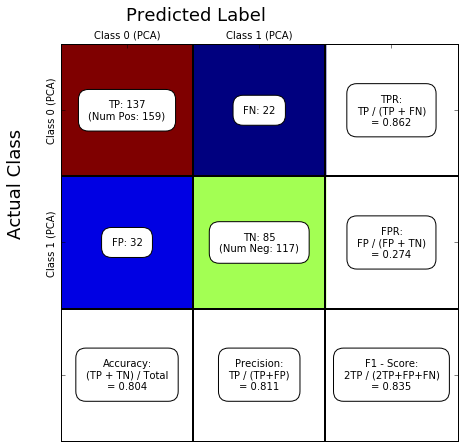

In [10]:
show_confusion_matrix(m_confusion_PCA, ['Class 0 (PCA)','Class 1 (PCA)'])

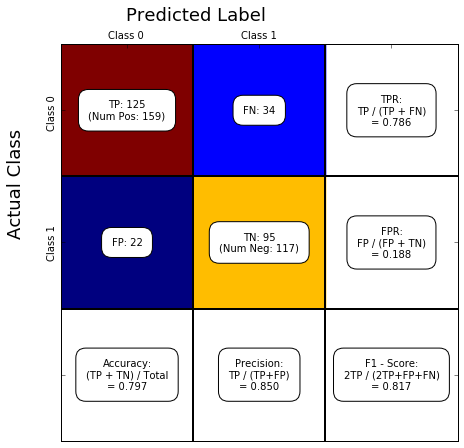

In [11]:
show_confusion_matrix(m_confusion, ['Class 0 ', 'Class 1'])

#### Resposta do segundo exercício: ####  

Para determinarmos a taxa de acerto, utilizamos a matriz de confusão com as seguintes métricas:

+ acurácia $= (tp + tn) / total $
+ true positive rate  $= tp / (tp + fn)$


, onde tp = _true positive_, tn = _true negativa_ e total é o número de linhas do conjunto de testes, (total = 276). As quantidades tp e fn


#### 3 - Treine o LDA nos conjuntos de treino com e sem PCA e teste nos respectivos conjuntos de testes. Qual a acurácia nas 2 condições?  #####

In [12]:
def doLDA(X, y, n):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    from sklearn import metrics
    lda = LDA(n_components=n)
    lda.fit(X, y)
    return lda

# lda in PCA data
ldaPCA = doLDA(X_train_PCA, y_train, element)

# lda in data
lda = doLDA(X_train, y_train, element)

# predicted sets
predicted_ldaPCA = ldaPCA.predict(X_test_PCA)
predicted_lda      = lda.predict(X_test)

# confusion matrix
lda_confusionPCA = metrics.confusion_matrix(y_test, predicted_ldaPCA)
lda_confusion    = metrics.confusion_matrix(y_test, predicted_lda)

print('Confusion Matrix LDA (PCA).\n', lda_confusionPCA)
print('\nConfusion Matrix LDA.\n', lda_confusion)

Confusion Matrix LDA (PCA).
 [[137  22]
 [ 33  84]]

Confusion Matrix LDA.
 [[103  56]
 [ 33  84]]


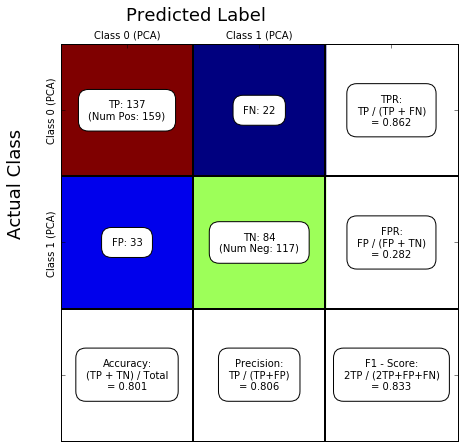

In [13]:
show_confusion_matrix(lda_confusionPCA, ['Class 0 (PCA)','Class 1 (PCA)']) 

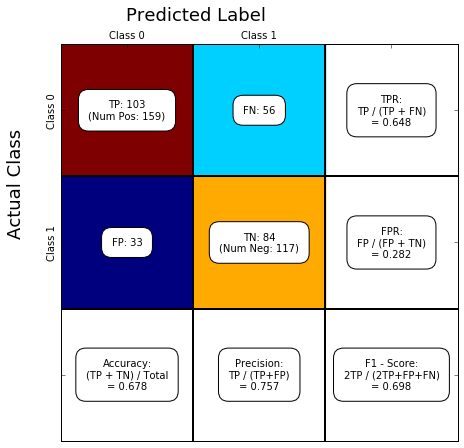

In [14]:
show_confusion_matrix(lda_confusion, ['Class 0','Class 1'])

#### 4 -Qual a melhor combinação de classificador e PCA ou não? ####

LR com PCA.